In [90]:
import pandas as pd
import numpy as np
import missingno as mo

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rule
from sklearn.linear_model import LogisticRegression as Logit

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

#plotting
from plotnine import *
import matplotlib.pyplot as plt

# permutation
from sklearn.inspection import permutation_importance

In [91]:
jordan = pd.read_csv("arabbaro/arabbaro_jo_labeled_reduced.csv")

In [92]:
jordan.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [93]:
kuwait = pd.read_csv("arabbaro/arabbaro_kuw_labeled_reduced.csv")

In [94]:
kuwait.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [95]:
egypt = pd.read_csv("arabbaro/arabbaro_egy_labeled_reduced.csv")

In [96]:
egypt.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [97]:
morocco = pd.read_csv("arabbaro/arabbaro_mor_labeled_reduced.csv")

In [98]:
morocco.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [99]:
algeria = pd.read_csv("arabbaro/arabbaro_alg_labeled_reduced.csv")

In [100]:
algeria.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [101]:
def dempref(df):
    # set up SKLearn Framework
    y = df.y_2_dem_pref_not_in_dem
    if 'y_1_trsut_gov' in df.columns:
        X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_trust_gov"])
    else:  
        X = df.drop(columns = "y_2_dem_pref_not_in_dem")

    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=4)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

In [102]:
def trustgov(df):
    # set up SKLearn Framework
    y = df.y_1_trust_gov
    if 'y_2_dem_pref_not_in_dem' in df.columns:
        X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_trust_gov"])
    else:  
        X = df.drop(columns = "y_1_trust_gov")
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=4)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

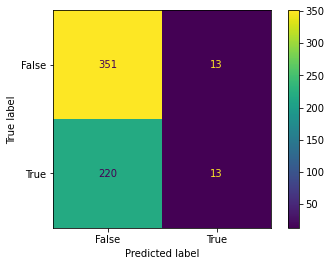

In [103]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(jordan)

In [104]:
score

0.6161531739271537

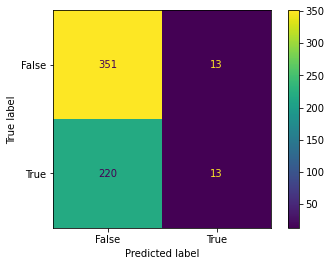

In [105]:
confusion.figure_

In [106]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=500))])

In [107]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [108]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,y_1_trust_gov,0.017979,0.005231,0.007518,0.028440
1,age,0.016639,0.002878,0.010884,0.022394
2,male,0.010497,0.003025,0.004446,0.016548
3,internet_use_ordinal_4_is_top,0.009604,0.003066,0.003471,0.015736
4,internet_use_bin,0.008822,0.002379,0.004063,0.013581
5,educ,0.007594,0.001302,0.004989,0.010198
6,neighb_rich,0.007147,0.001083,0.004981,0.009312
7,employed_priv_sec,0.004243,0.000569,0.003105,0.005382
8,retired,0.004132,0.000836,0.002460,0.005803
9,neighb_mixed,0.004132,0.000670,0.002792,0.005472


In [109]:
vi_dat.to_csv("variable importance csv/jordan_y2")

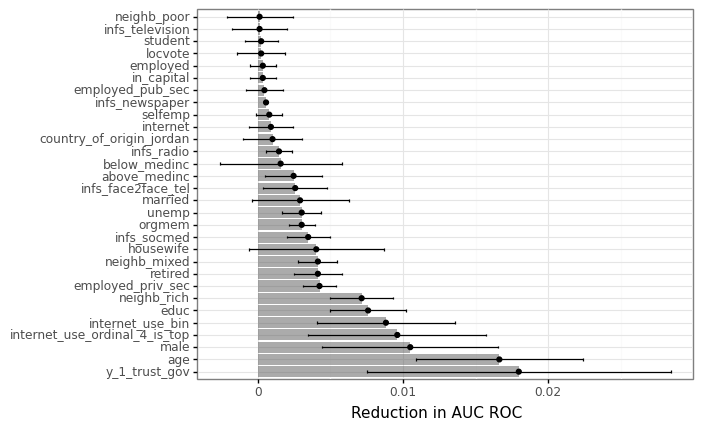

<ggplot: (8793878869477)>

In [110]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

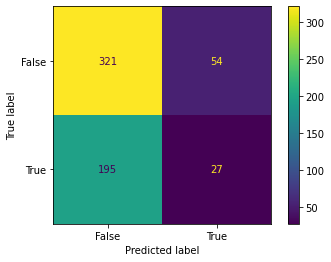

In [111]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(jordan)

In [112]:
score

0.5860997063624547

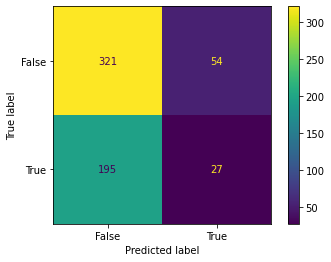

In [113]:
confusion.figure_

In [114]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', LogisticRegression())])

In [115]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [116]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,above_medinc,0.019989,0.004402,0.011185,0.028793
1,retired,0.009715,0.003435,0.002846,0.016585
2,educ,0.008375,0.003636,0.001104,0.015647
3,internet,0.008152,0.002332,0.003488,0.012815
4,married,0.006253,0.001744,0.002765,0.009742
5,neighb_mixed,0.005360,0.001349,0.002662,0.008059
6,housewife,0.004690,0.005809,-0.006928,0.016308
7,infs_face2face_tel,0.004020,0.002878,-0.001735,0.009775
8,infs_radio,0.003685,0.001603,0.000480,0.006891
9,locvote,0.001787,0.003066,-0.004346,0.007919


In [117]:
vi_dat.to_csv("variable importance csv/jordan_y1")

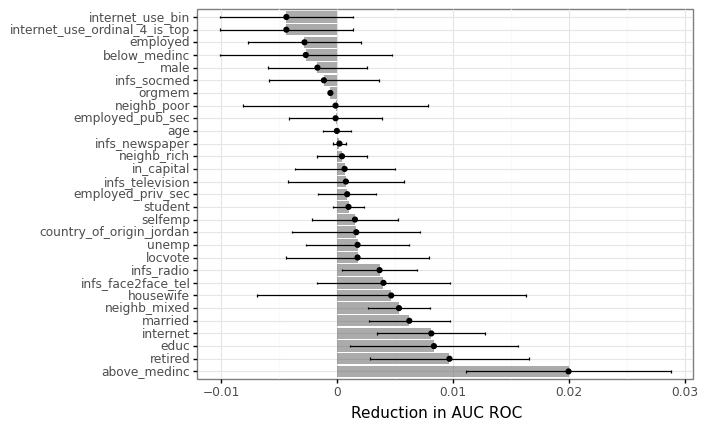

<ggplot: (8793862236627)>

In [118]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [119]:
kuwait.isna().sum()

below_medinc             0
above_medinc             0
in_capital               0
married                  0
employed                 0
employed_pub_sec         0
employed_priv_sec        0
selfemp                  0
retired                  0
housewife                0
student                  0
unemp                    0
neighb_rich           1364
neighb_poor           1364
neighb_mixed          1364
educ                     0
male                     0
age                      0
orgmem                   0
locvote                  0
internet                 0
internet_use_bin         0
infs_face2face_tel       0
infs_newspaper           0
infs_radio               0
infs_television          0
infs_socmed              0
y_1_trust_gov            0
dtype: int64

In [120]:
kuwait.drop(columns = ["neighb_rich", "neighb_poor", "neighb_mixed"], inplace = True)

In [121]:
kuwait

,below_medinc,above_medinc,in_capital,married,employed,employed_pub_sec,employed_priv_sec,selfemp,retired,housewife,...,orgmem,locvote,internet,internet_use_bin,infs_face2face_tel,infs_newspaper,infs_radio,infs_television,infs_socmed,y_1_trust_gov
0,False,False,False,True,True,True,False,False,False,False,...,False,False,True,1.0,False,False,False,False,True,False
1,False,True,False,True,True,True,False,False,False,False,...,True,True,True,1.0,False,False,False,False,True,True
2,False,False,False,True,False,False,False,False,True,False,...,False,False,True,0.8,False,False,False,False,True,False
3,True,False,False,True,False,False,False,False,True,False,...,False,True,True,1.0,False,False,False,False,True,False
4,True,False,False,True,True,True,False,False,False,False,...,False,False,True,1.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,False,True,False,True,False,False,False,False,True,False,...,False,True,True,0.8,False,False,False,False,True,True
1360,False,False,False,False,False,False,False,False,False,False,...,True,False,True,1.0,False,False,False,False,True,True
1361,False,False,False,True,True,True,False,False,False,False,...,False,True,True,1.0,False,False,False,False,True,False
1362,False,False,False,True,True,True,False,False,False,False,...,True,True,True,1.0,False,False,False,False,True,False


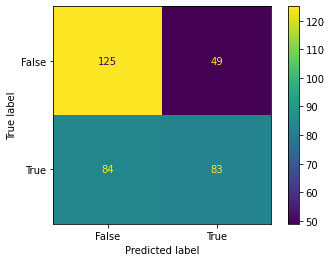

In [122]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(kuwait)

In [123]:
score

0.6538443161928471

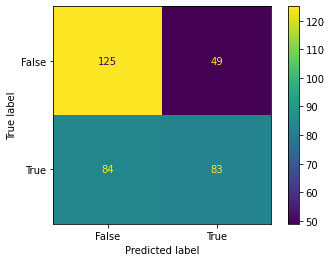

In [124]:
confusion.figure_

In [125]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1500))])

In [126]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [127]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,infs_socmed,0.076442,0.007378,0.061687,0.091197
1,age,0.046725,0.008023,0.030680,0.062771
2,above_medinc,0.026002,0.003189,0.019625,0.032379
3,retired,0.019550,0.003959,0.011633,0.027468
4,educ,0.019550,0.002695,0.014161,0.024940
5,orgmem,0.013099,0.004568,0.003962,0.022235
6,in_capital,0.012317,0.001326,0.009665,0.014969
7,infs_television,0.011926,0.003678,0.004569,0.019282
8,internet_use_bin,0.011926,0.002652,0.006622,0.017230
9,locvote,0.011339,0.003364,0.004612,0.018066


In [128]:
vi_dat.to_csv("variable importance csv/kuwait_y1")

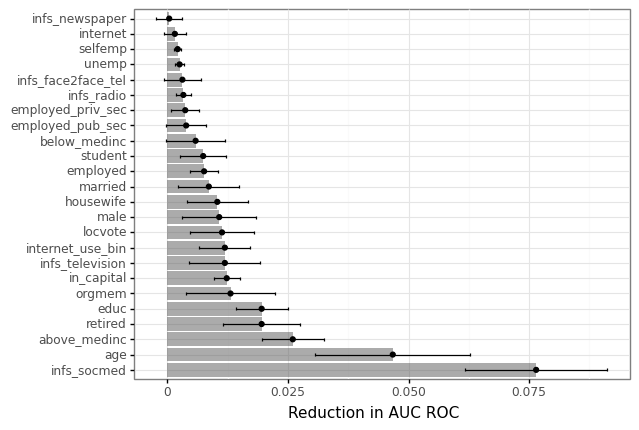

<ggplot: (8793900368041)>

In [129]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

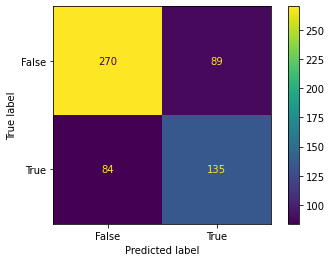

In [130]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(morocco)

In [131]:
score

0.7501451675462532

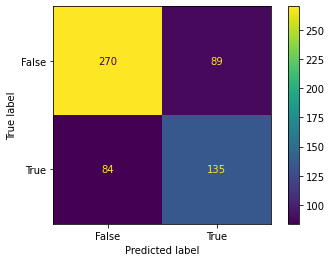

In [132]:
confusion.figure_

In [133]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=10,
                                        n_estimators=1500))])

In [134]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [135]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,y_1_trust_gov,7.289504e-02,0.006022,0.060851,0.084939
1,educ,5.490196e-02,0.004291,0.046320,0.063484
2,age,2.076125e-02,0.002941,0.014880,0.026642
3,male,9.227220e-03,0.001032,0.007164,0.011290
4,internet_use_bin,9.227220e-03,0.002655,0.003917,0.014538
5,orgmem,5.882353e-03,0.001335,0.003212,0.008553
6,locvote,4.382930e-03,0.001695,0.000993,0.007773
7,infs_socmed,4.267589e-03,0.001809,0.000650,0.007886
8,infs_face2face_tel,3.806228e-03,0.000588,0.002630,0.004982
9,married,3.690888e-03,0.000782,0.002126,0.005255


In [136]:
vi_dat.to_csv("variable importance csv/morocco_y2")

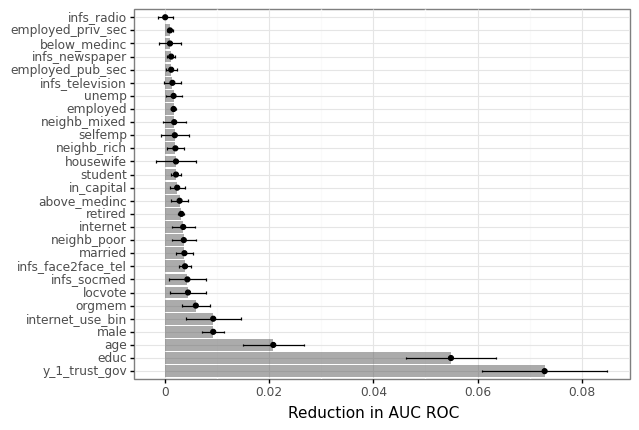

<ggplot: (8793900902596)>

In [137]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

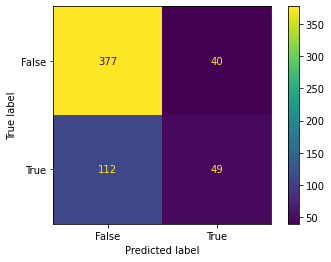

In [138]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(morocco)

In [139]:
score

0.7345153004003828

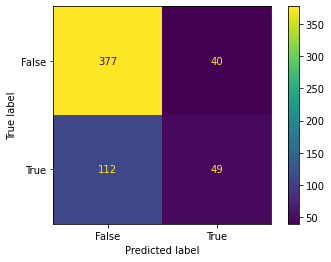

In [140]:
confusion.figure_

In [141]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1000))])

In [142]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [143]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.057670,0.002219,0.053233,0.062107
1,locvote,0.047059,0.005230,0.036599,0.057519
2,infs_television,0.020531,0.003730,0.013070,0.027991
3,educ,0.015917,0.002436,0.011045,0.020789
4,employed,0.011188,0.000588,0.010012,0.012364
5,infs_socmed,0.011188,0.000937,0.009314,0.013062
6,neighb_poor,0.008997,0.002436,0.004125,0.013868
7,internet_use_bin,0.008074,0.000893,0.006287,0.009861
8,unemp,0.007728,0.002050,0.003627,0.011828
9,neighb_mixed,0.007151,0.002954,0.001243,0.013059


In [144]:
vi_dat.to_csv("variable importance csv/morocco_y1")

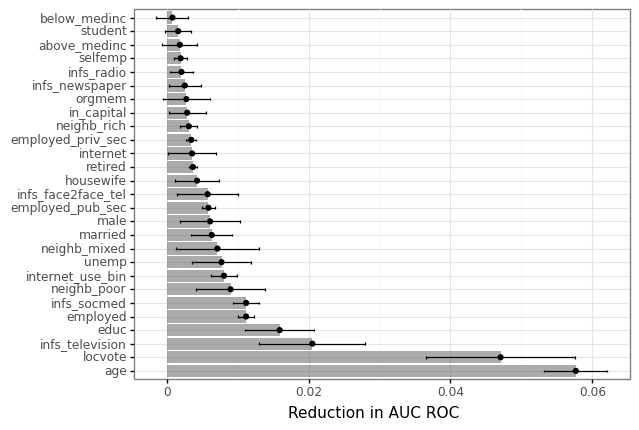

<ggplot: (8793900708500)>

In [145]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [146]:
egypt.drop(columns = "locvote", inplace = True)

In [147]:
egypt.dropna(inplace = True)

In [148]:
egypt.isna().sum()

below_medinc               0
above_medinc               0
in_capital                 0
married                    0
employed                   0
employed_pub_sec           0
employed_priv_sec          0
selfemp                    0
retired                    0
housewife                  0
student                    0
unemp                      0
neighb_rich                0
neighb_poor                0
neighb_mixed               0
educ                       0
male                       0
age                        0
orgmem                     0
internet                   0
internet_use_bin           0
infs_face2face_tel         0
infs_newspaper             0
infs_radio                 0
infs_television            0
infs_socmed                0
y_2_dem_pref_not_in_dem    0
y_1_trust_gov              0
dtype: int64

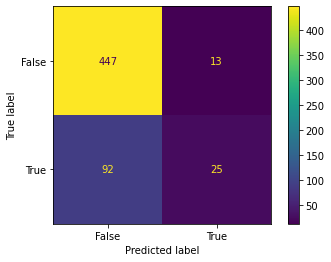

In [149]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(egypt)

In [150]:
score

0.7491635817647887

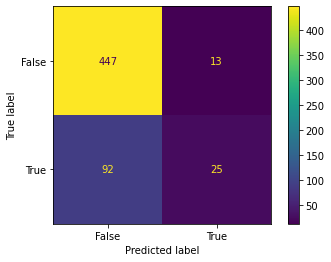

In [151]:
confusion.figure_

In [152]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        n_estimators=1500))])

In [153]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [154]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,y_1_trust_gov,0.044855,0.003948,3.696029e-02,0.052751
1,internet_use_bin,0.038035,0.003132,3.177054e-02,0.044299
2,infs_socmed,0.036069,0.003948,2.817416e-02,0.043965
3,age,0.019422,0.002469,1.448459e-02,0.024359
4,educ,0.014566,0.002295,9.977010e-03,0.019156
5,infs_television,0.011792,0.001190,9.411415e-03,0.014172
6,below_medinc,0.009827,0.001934,5.957641e-03,0.013696
7,above_medinc,0.005318,0.001480,2.356937e-03,0.008279
8,orgmem,0.004740,0.001287,2.165196e-03,0.007315
9,unemp,0.004740,0.000994,2.750907e-03,0.006729


In [155]:
vi_dat.to_csv("variable importance csv/egypt_y2")

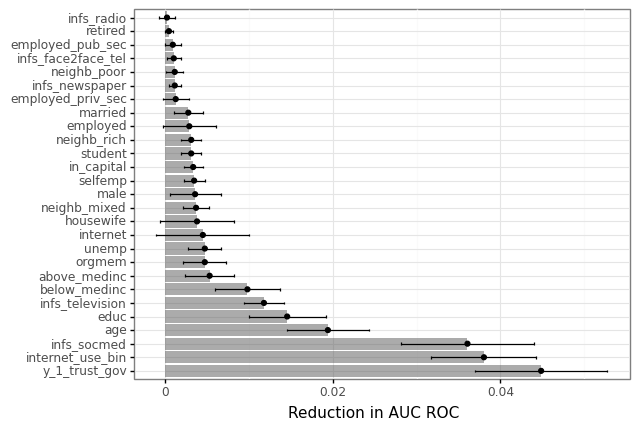

<ggplot: (8793862273052)>

In [156]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

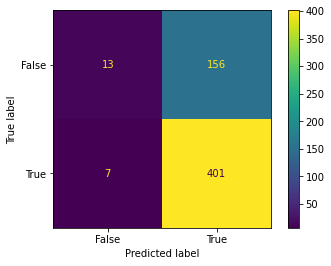

In [157]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(egypt)

In [158]:
score

0.6548158040954004

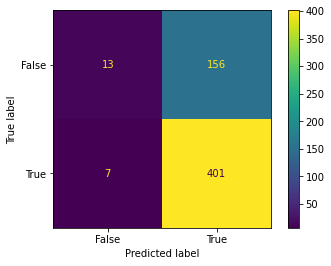

In [159]:
confusion.figure_

In [160]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features=5,
                                        n_estimators=500))])

In [161]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [162]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.023815,0.001179,2.145710e-02,0.026173
1,unemp,0.017919,0.001715,1.448962e-02,0.021349
2,infs_television,0.015260,0.002575,1.011074e-02,0.020409
3,married,0.011561,0.001034,9.492654e-03,0.013629
4,internet_use_bin,0.010983,0.001318,8.346415e-03,0.013619
5,infs_socmed,0.007977,0.001948,4.080393e-03,0.011873
6,orgmem,0.006705,0.001190,4.324710e-03,0.009086
7,internet,0.006012,0.000865,4.281315e-03,0.007742
8,male,0.005434,0.000784,3.865357e-03,0.007002
9,employed,0.004740,0.000433,3.874761e-03,0.005605


In [163]:
vi_dat.to_csv("variable importance csv/egypt_y1")

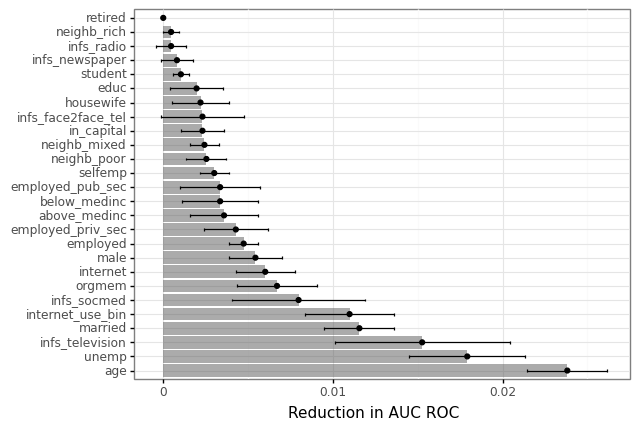

<ggplot: (8793862367687)>

In [164]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [165]:
algeria.dropna(inplace = True)

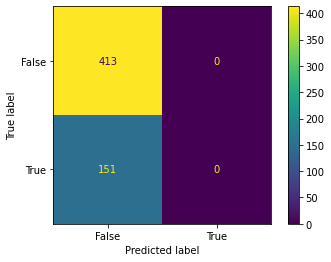

In [166]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(algeria)

In [167]:
score

0.6150833811004158

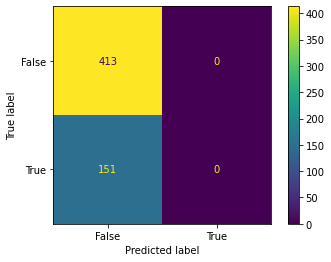

In [168]:
confusion.figure_

In [169]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1000))])

In [170]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [171]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,infs_newspaper,0.003075,0.000443,0.002190,0.003960
1,locvote,0.002484,0.000443,0.001599,0.003369
2,age,0.002129,0.000473,0.001183,0.003075
3,internet_use_bin,0.001892,0.000690,0.000513,0.003272
4,retired,0.001892,0.000443,0.001007,0.002777
5,educ,0.001656,0.000443,0.000771,0.002541
6,employed,0.001301,0.000237,0.000828,0.001774
7,internet,0.001183,0.000374,0.000435,0.001931
8,male,0.001064,0.000443,0.000179,0.001950
9,neighb_mixed,0.000946,0.000290,0.000367,0.001526


In [172]:
vi_dat.to_csv("variable importance csv/algeria_y2")

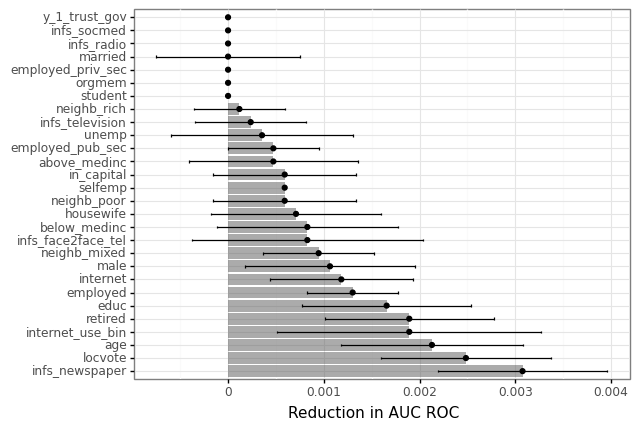

<ggplot: (8793879189480)>

In [173]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [174]:
from sklearn.datasets import make_classification

In [175]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = Logit(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [176]:
# predict probabilities
yhat = model.predict_proba(testX)
yhat

array([[9.92758703e-01, 7.24129721e-03],
       [9.96495510e-01, 3.50448974e-03],
       [9.99867566e-01, 1.32433775e-04],
       ...,
       [9.98780592e-01, 1.21940764e-03],
       [9.99705540e-01, 2.94459735e-04],
       [9.99603387e-01, 3.96613003e-04]])

In [177]:
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [178]:
# keep probabilities for the positive outcome only
yhat

array([0.0072413 , 0.00350449, 0.00013243, ..., 0.00121941, 0.00029446,
       0.00039661])

In [179]:
# calculate roc curves
fpr, tpr, thresholds = m.roc_curve(testy, yhat)
print(fpr) 
print(tpr) 
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.02020202e-04
 2.02020202e-04 6.06060606e-04 6.06060606e-04 1.01010101e-03
 1.01010101e-03 1.21212121e-03 1.21212121e-03 1.81818182e-03
 1.81818182e-03 3.63636364e-03 3.63636364e-03 5.65656566e-03
 5.65656566e-03 6.66666667e-03 6.66666667e-03 8.48484848e-03
 8.48484848e-03 1.01010101e-02 1.01010101e-02 1.37373737e-02
 1.37373737e-02 1.63636364e-02 1.63636364e-02 2.38383838e-02
 2.38383838e-02 4.28282828e-02 4.28282828e-02 4.56565657e-02
 4.56565657e-02 5.29292929e-02 5.29292929e-02 9.91919192e-02
 9.91919192e-02 1.57979798e-01 1.57979798e-01 2.35555556e-01
 2.35555556e-01 2.65252525e-01 2.65252525e-01 1.00000000e+00]
[0.   0.02 0.56 0.56 0.58 0.58 0.62 0.62 0.66 0.66 0.68 0.68 0.7  0.7
 0.72 0.72 0.74 0.74 0.76 0.76 0.78 0.78 0.8  0.8  0.82 0.82 0.84 0.84
 0.86 0.86 0.88 0.88 0.9  0.9  0.92 0.92 0.94 0.94 0.96 0.96 0.98 0.98
 1.   1.  ]
[1.99999835e+00 9.99998347e-01 4.96107783e-01 4.64133790e-01
 4.37378298e-01 4.10290652e-01 3.60605429e-

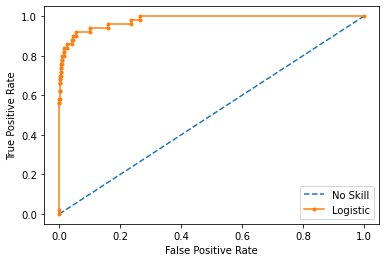

In [180]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

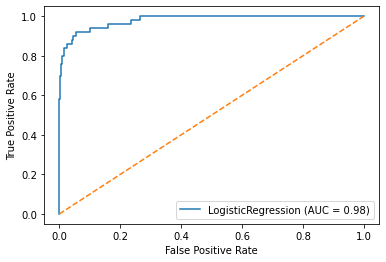

In [181]:
m.plot_roc_curve(model, testX, testy)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')